<a href="https://colab.research.google.com/github/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/blob/main/Company_Bankruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDClassifier

In [221]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/main/company_bankruptcy.csv')

In [222]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [223]:
df_bank.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [224]:
df_bank.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [225]:
df_bank.columns = df_bank.columns.str.replace(' ', '')

In [226]:
df_bank.columns.duplicated().sum()

0

In [227]:
# drop duplicate columns
df_bank = df_bank.loc[:,~df_bank.columns.duplicated()]

In [228]:
df_bank['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

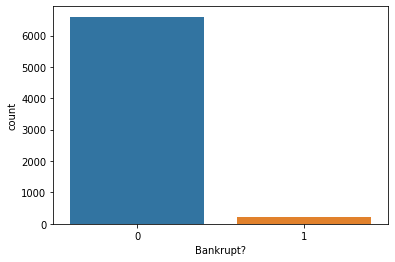

In [229]:
sns.countplot(x='Bankrupt?', data=df_bank)

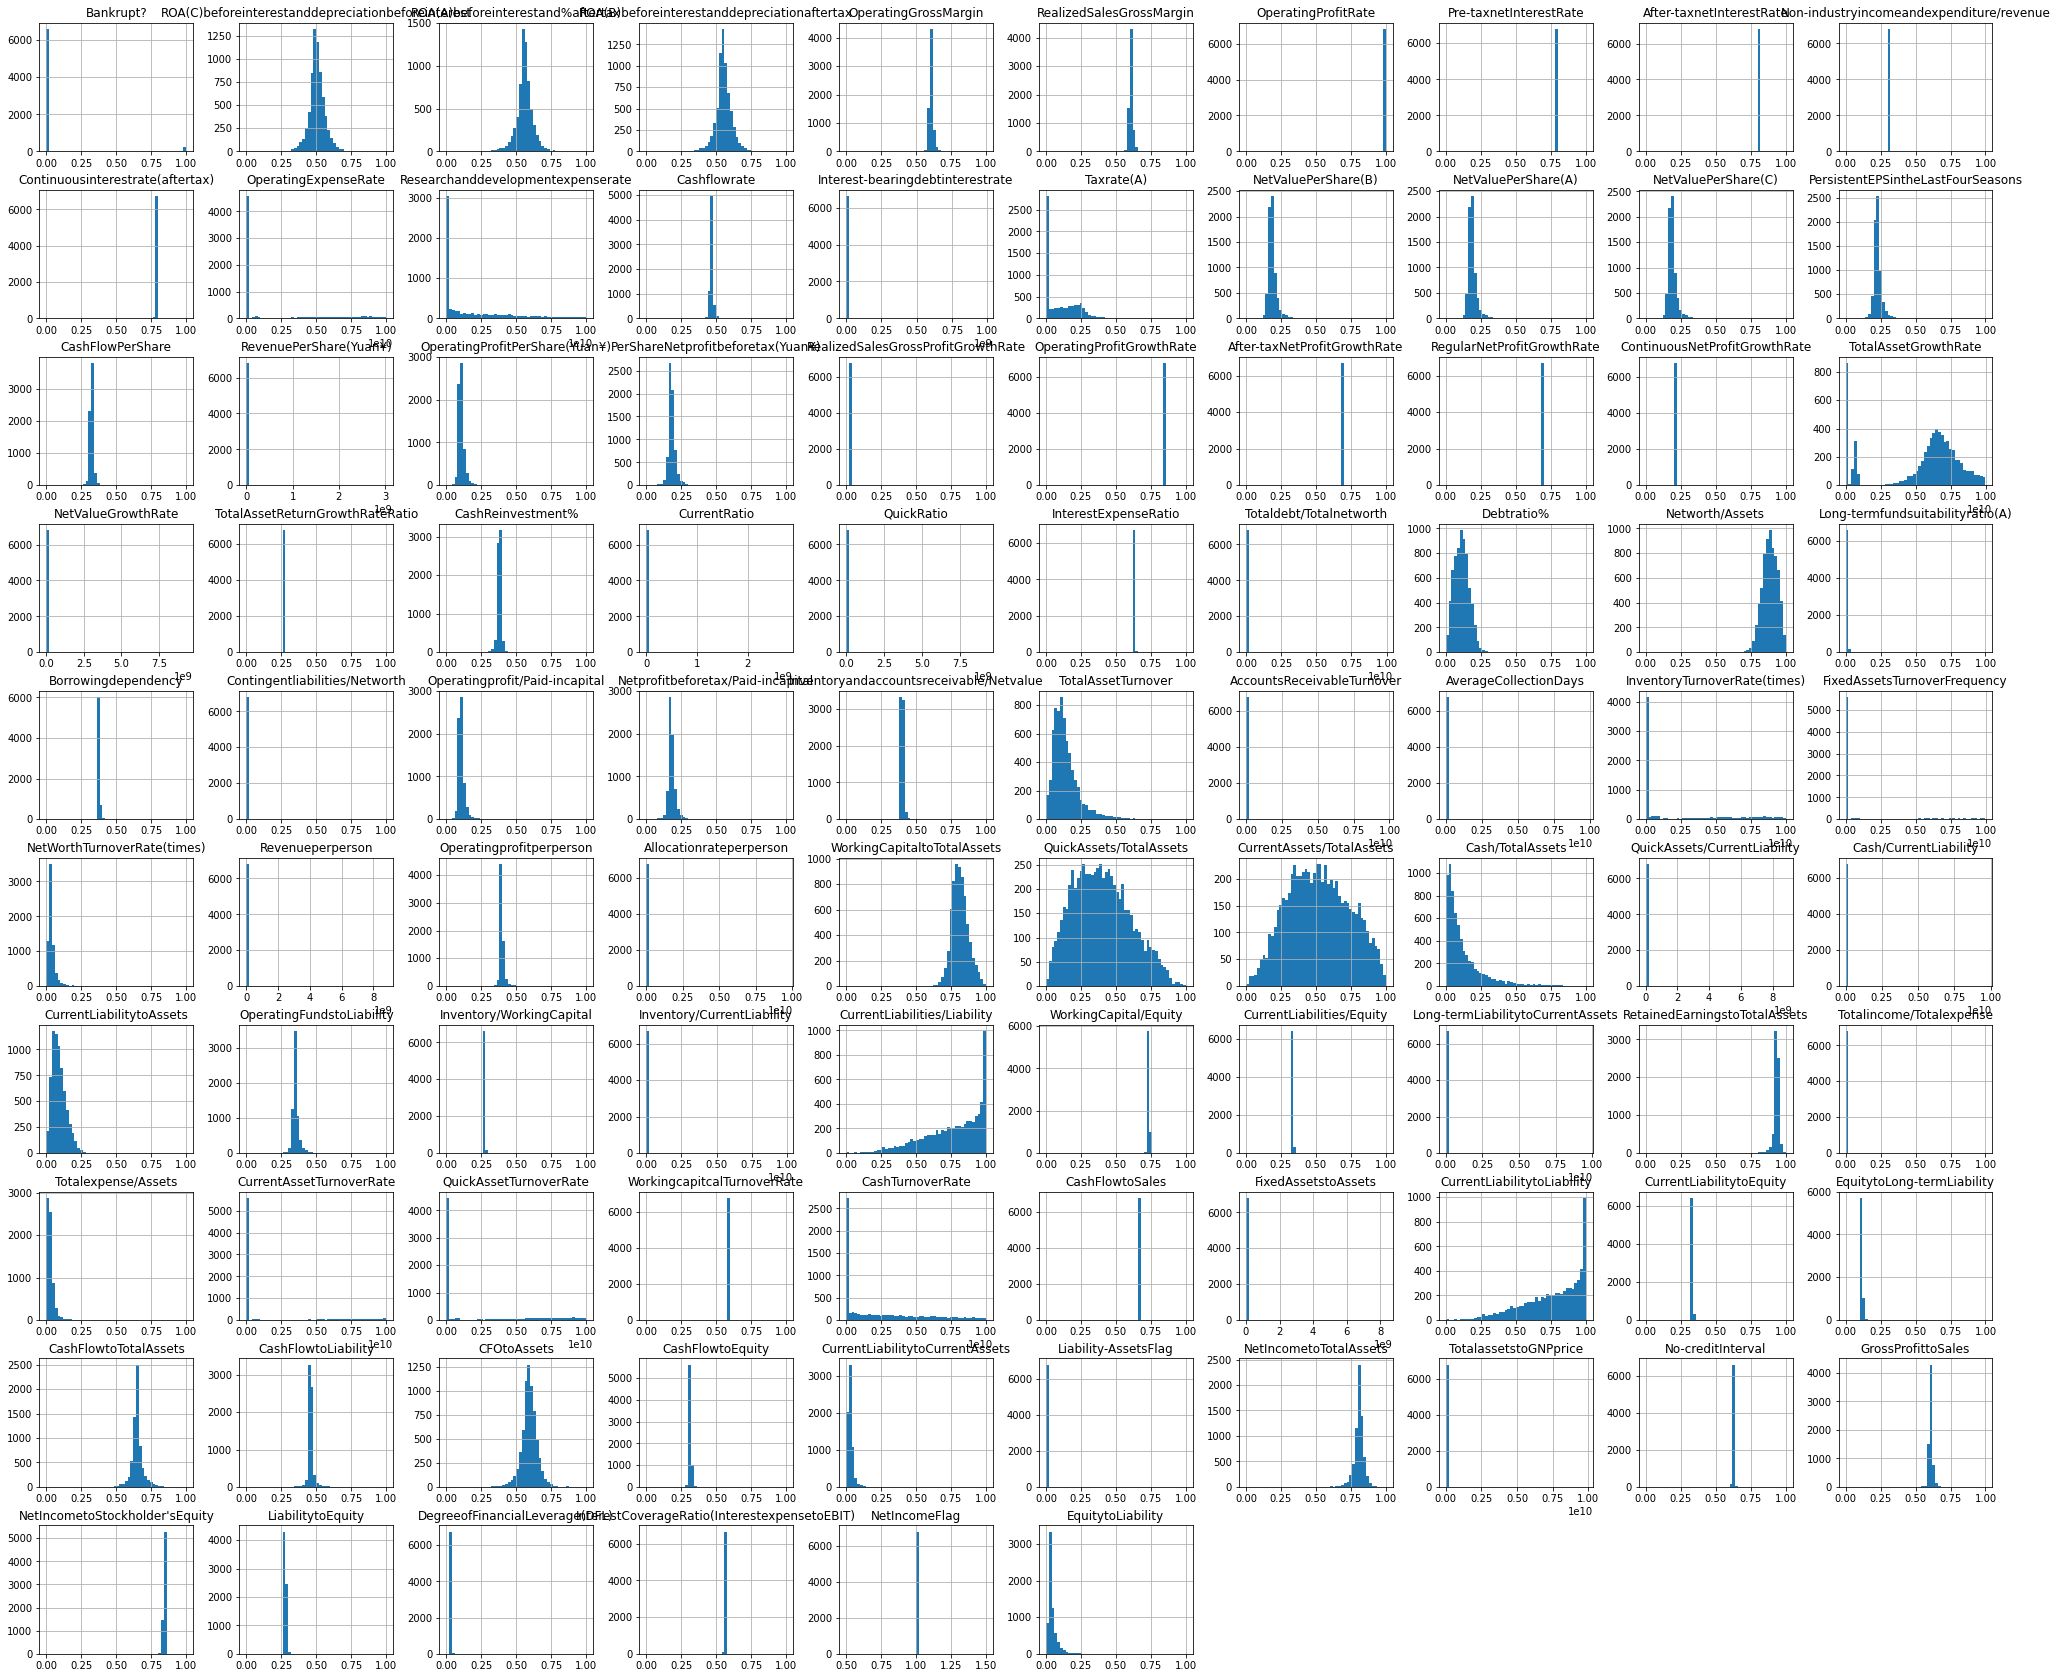

In [230]:
df_bank.hist(figsize = (35,30), bins = 50)
plt.show()

In [232]:
corr_matrix['Bankrupt?'][corr_matrix['Bankrupt?'] > 0]

Bankrupt?                                  1.000000
NetValueGrowthRate                         0.065329
QuickRatio                                 0.025058
Totaldebt/Totalnetworth                    0.012314
Debtratio%                                 0.250161
Long-termfundsuitabilityratio(A)           0.016920
Borrowingdependency                        0.176543
Contingentliabilities/Networth             0.070455
Inventoryandaccountsreceivable/Netvalue    0.075278
FixedAssetsTurnoverFrequency               0.072818
NetWorthTurnoverRate(times)                0.021089
Revenueperperson                           0.039718
Allocationrateperperson                    0.002829
Cash/CurrentLiability                      0.077921
CurrentLiabilitytoAssets                   0.194494
Inventory/CurrentLiability                 0.000822
CurrentLiabilities/Equity                  0.153828
Long-termLiabilitytoCurrentAssets          0.000778
Totalexpense/Assets                        0.139049
CurrentAsset

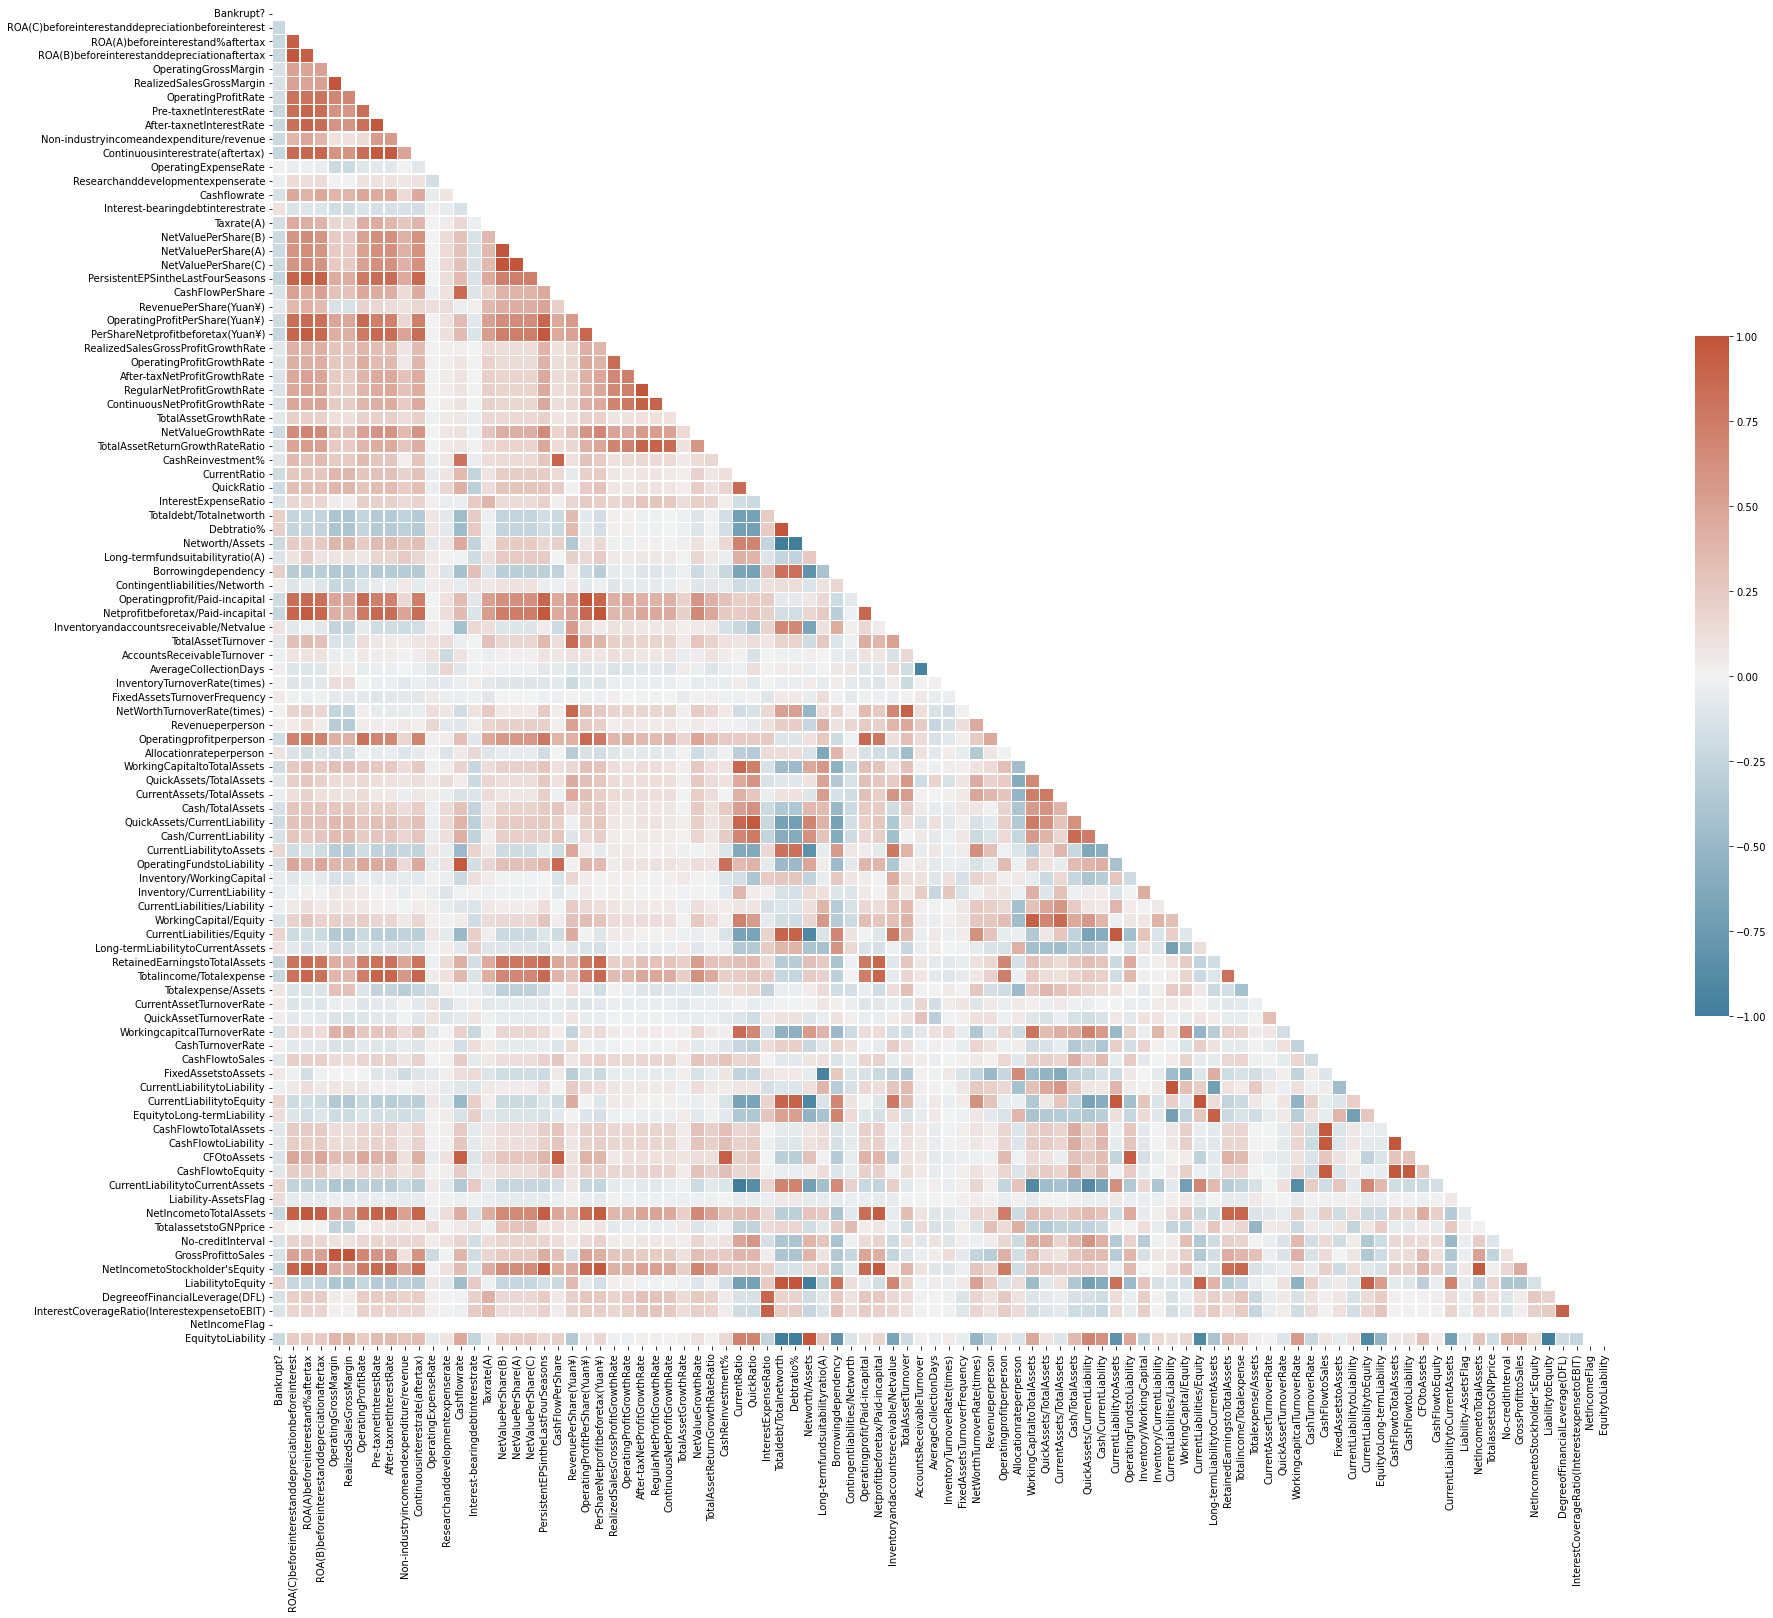

In [233]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df_bank.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [234]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_bank.values, i) for i in range(df_bank.shape[1])]
vif['variable'] = df_bank.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,variable
0,1.255015e+00,Bankrupt?
1,6.930177e+01,ROA(C)beforeinterestanddepreciationbeforeinterest
2,4.425140e+01,ROA(A)beforeinterestand%aftertax
3,1.032851e+02,ROA(B)beforeinterestanddepreciationaftertax
4,6.557756e+07,OperatingGrossMargin
...,...,...
91,4.704476e+02,LiabilitytoEquity
92,1.004920e+00,DegreeofFinancialLeverage(DFL)
93,1.006994e+00,InterestCoverageRatio(InterestexpensetoEBIT)
94,0.000000e+00,NetIncomeFlag


In [235]:
# let's see what happens if we split the dataset into equal bankrupt/not bankrupt 
bankrupt_sample = df_bank[df_bank['Bankrupt?'] == 0][0:220]
non_bankrupt_sample = df_bank[df_bank['Bankrupt?'] == 1]
new_df_bank = pd.concat([bankrupt_sample,non_bankrupt_sample],axis = 0)
new_df_bank.head()

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,ROA(A)beforeinterestand%aftertax,ROA(B)beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,Continuousinterestrate(aftertax),OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interest-bearingdebtinterestrate,Taxrate(A),NetValuePerShare(B),NetValuePerShare(A),NetValuePerShare(C),PersistentEPSintheLastFourSeasons,CashFlowPerShare,RevenuePerShare(Yuan¥),OperatingProfitPerShare(Yuan¥),PerShareNetprofitbeforetax(Yuan¥),RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,After-taxNetProfitGrowthRate,RegularNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment%,CurrentRatio,QuickRatio,InterestExpenseRatio,Totaldebt/Totalnetworth,Debtratio%,Networth/Assets,Long-termfundsuitabilityratio(A),...,CurrentAssets/TotalAssets,Cash/TotalAssets,QuickAssets/CurrentLiability,Cash/CurrentLiability,CurrentLiabilitytoAssets,OperatingFundstoLiability,Inventory/WorkingCapital,Inventory/CurrentLiability,CurrentLiabilities/Liability,WorkingCapital/Equity,CurrentLiabilities/Equity,Long-termLiabilitytoCurrentAssets,RetainedEarningstoTotalAssets,Totalincome/Totalexpense,Totalexpense/Assets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,WorkingcapitcalTurnoverRate,CashTurnoverRate,CashFlowtoSales,FixedAssetstoAssets,CurrentLiabilitytoLiability,CurrentLiabilitytoEquity,EquitytoLong-termLiability,CashFlowtoTotalAssets,CashFlowtoLiability,CFOtoAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,Liability-AssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),NetIncomeFlag,EquitytoLiability
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,0.781180,3.984834e-04,7.300000e+08,0.461020,0.000805,0.000000,0.158822,0.158822,0.158822,0.161482,0.316687,0.030915,0.099910,0.128945,0.022112,0.848322,0.688590,0.688590,0.217604,5.720000e+09,0.000352,0.263032,0.375303,0.004672,0.002869,0.629988,0.024441,0.216102,0.783898,0.005005,...,0.295221,0.022989,0.003974,0.001050,0.115920,0.340081,0.276643,0.002159,0.508089,0.728731,0.337392,0.009347,0.911441,0.002121,0.092802,1.058011e-04,9.560000e+09,0.593893,2.390000e+09,0.671562,0.355854,0.508089,0.337392,0.120561,0.630419,0.457785,0.560653,0.310296,0.060765,0,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,0.781621,9.000000e+09,5.090000e+07,0.467024,0.000630,0.157607,0.176984,0.176984,0.176984,0.225206,0.324114,0.042561,0.104796,0.180462,0.022114,0.848082,0.689535,0.689535,0.217633,6.630000e+09,0.000451,0.264112,0.384235,0.009657,0.007305,0.631379,0.005278,0.108202,0.891798,0.005640,...,0.447942,0.014616,0.007565,0.000888,0.087042,0.353511,0.277275,0.005756,0.755770,0.734946,0.329804,0.005346,0.935449,0.002360,0.025482,7.290000e+09,6.180000e+09,0.593937,7.340000e+08,0.671572,0.218473,0.755770,0.329804,0.114508,0.641553,0.458954,0.610091,0.314364,0.030201,0,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,0.781598,1.687136e-04,0.000000e+00,0.463142,0.000737,0.005871,0.184189,0.184189,0.184189,0.218398,0.318773,0.026604,0.095188,0.173157,0.022128,0.848159,0.689924,0.689924,0.217654,6.890000e+09,0.000453,0.264151,0.377994,0.013499,0.011823,0.630915,0.002266,0.058591,0.941409,0.005418,...,0.414646,0.145189,0.011938,0.013190,0.058060,0.345441,0.277087,0.004385,0.906707,0.735182,0.328093,0.000000,0.935200,0.002274,0.029884,1.026722e-04,9.840000e+09,0.593959,1.052297e-04,0.671576,0.323861,0.906707

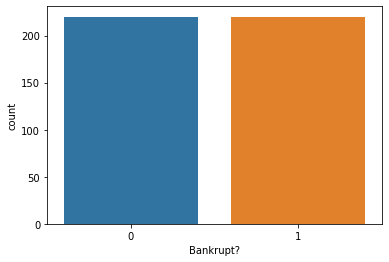

In [236]:
sns.countplot(x='Bankrupt?', data=new_df_bank)

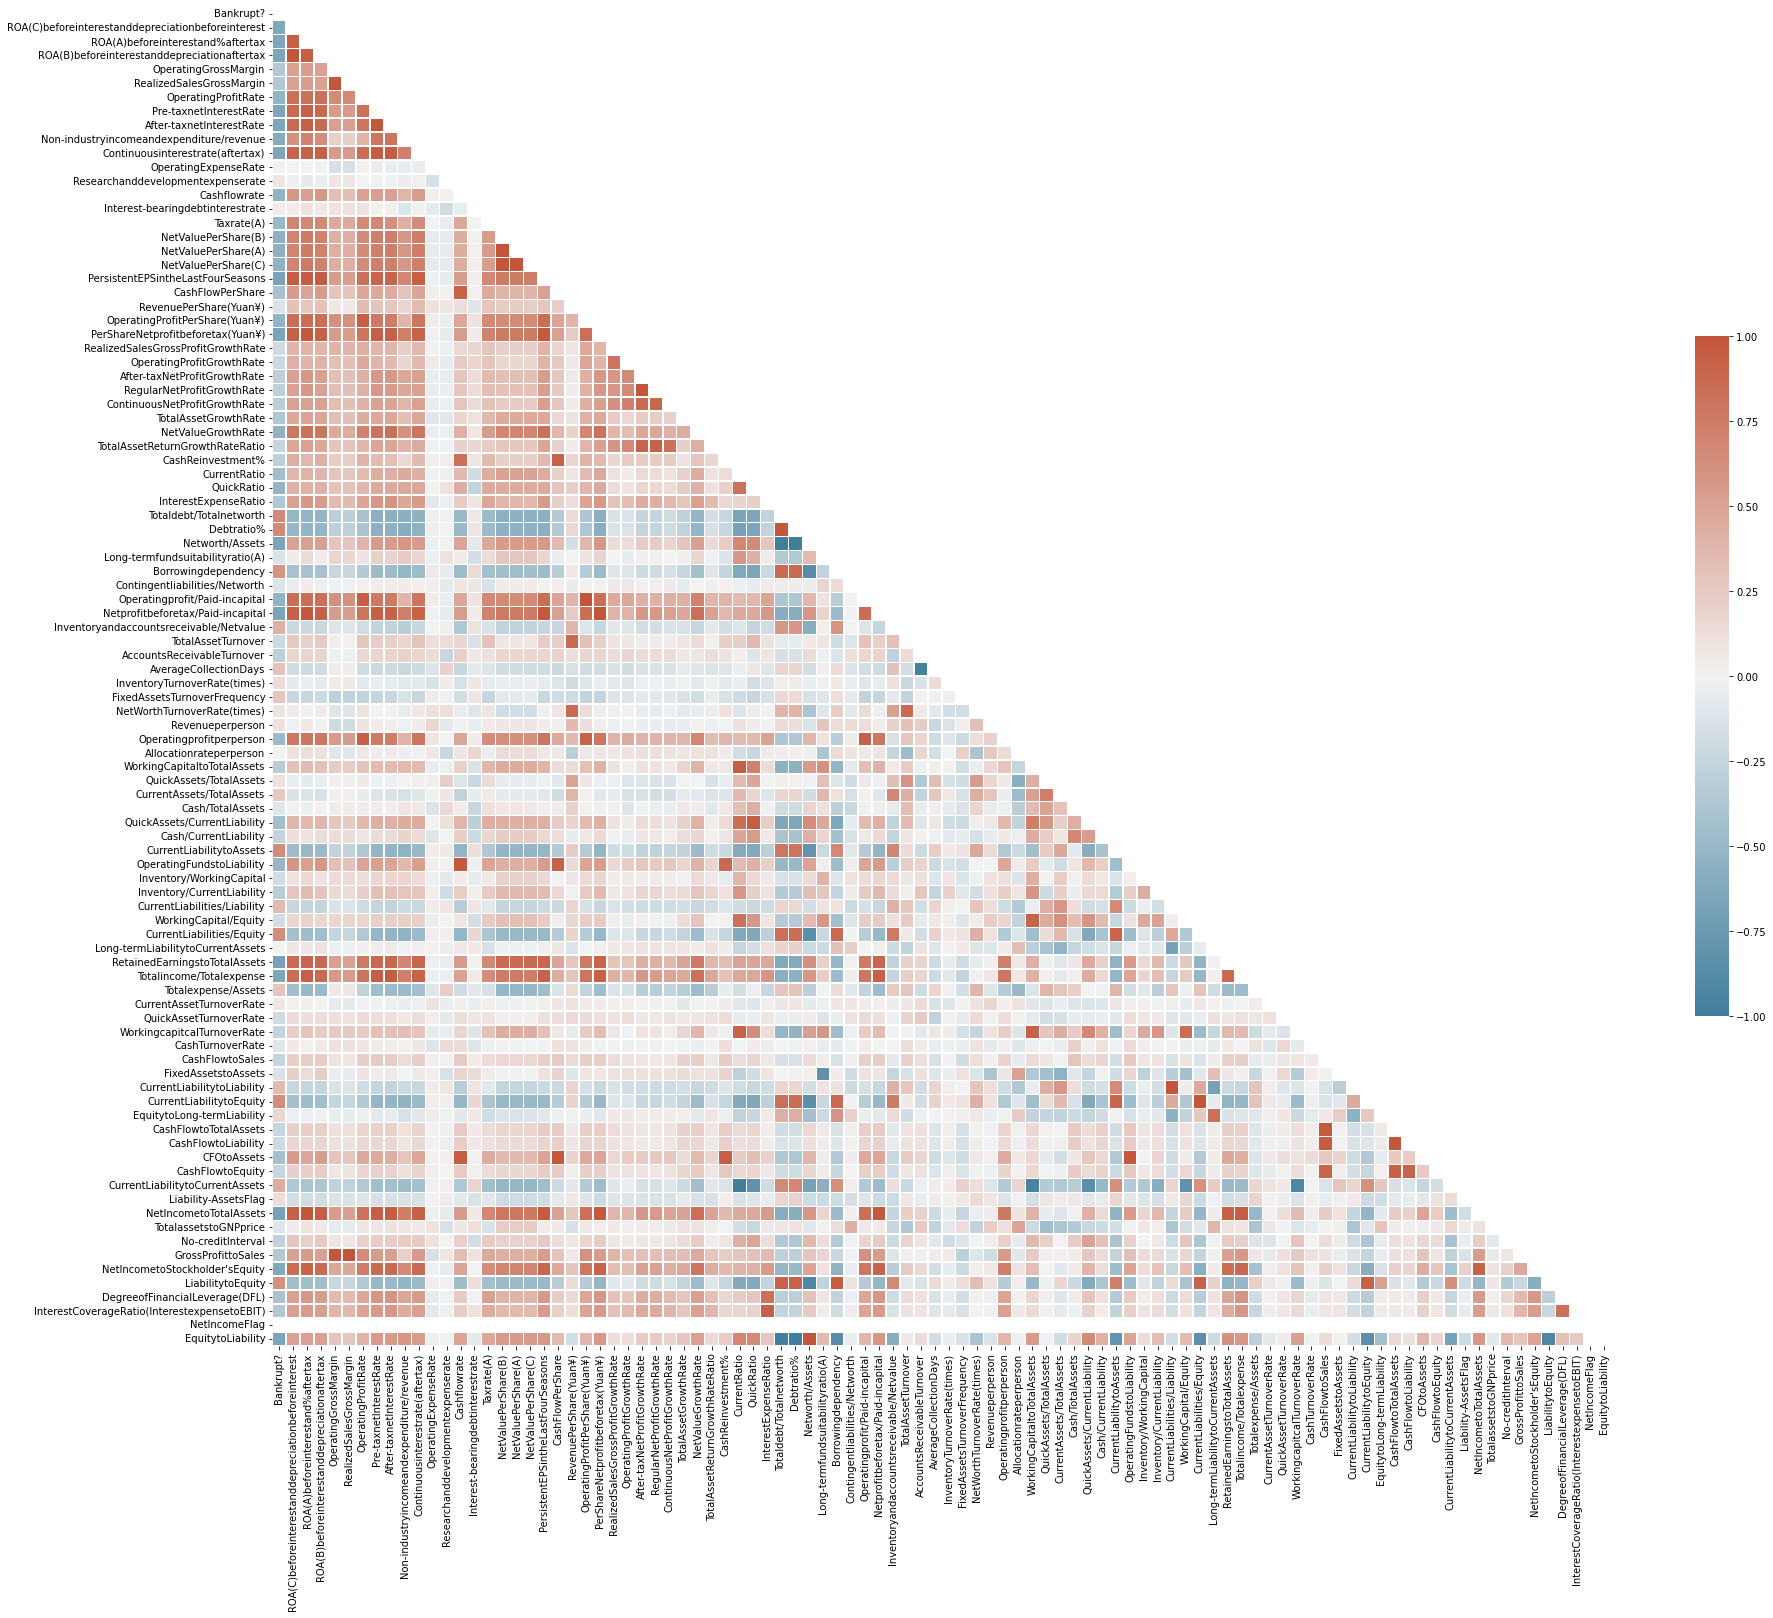

In [237]:
f, ax = plt.subplots(figsize=(30, 25))
mat = new_df_bank.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [239]:
corr_matrix2['Bankrupt?'][corr_matrix2['Bankrupt?'] > 0]

Bankrupt?                                  1.000000
Researchanddevelopmentexpenserate          0.198664
RealizedSalesGrossProfitGrowthRate         0.050920
NetValueGrowthRate                         0.047727
QuickRatio                                 0.047727
Totaldebt/Totalnetworth                    0.047727
Debtratio%                                 0.616173
Long-termfundsuitabilityratio(A)           0.066318
Borrowingdependency                        0.152944
Contingentliabilities/Networth             0.048818
Inventoryandaccountsreceivable/Netvalue    0.145225
AccountsReceivableTurnover                 0.047727
AverageCollectionDays                      0.047727
InventoryTurnoverRate(times)               0.022947
FixedAssetsTurnoverFrequency               0.101127
NetWorthTurnoverRate(times)                0.158736
Revenueperperson                           0.047727
Allocationrateperperson                    0.047727
QuickAssets/TotalAssets                    0.173780
CurrentAsset

After taking an even sample of companies that went bankrupt and companies that did not, it is easier to see what variables are and are not correlated to our Bankrupt? column. 

In [240]:
y = new_df_bank['Bankrupt?']
x = new_df_bank.drop('Bankrupt?', axis=1)

In [242]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [243]:
# I still don't know how to use this code.... 
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

#model = SGDClassifier(alpha=1.0, l1_ratio=0.5)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
#grid = dict()
#grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
#grid['l1_ratio'] = arange(0, 1, 0.01)

# define search
#search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
#results = search.fit(x_train, y_train)

# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [244]:
#from sklearn.model_selection import GridSearchCV

#model = LogisticRegression()
#grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}
#grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
#                       cv=6, refit=True, return_train_score=True) 

#Training and Prediction

#grid_lr.fit(X_train, y_train

### Model Selection

#### SGD Classifier

In [245]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)


SGDClassifier(random_state=42)

In [246]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [247]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.65254237, 0.52136752, 0.51282051])

In [248]:
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.75423729, 0.83760684, 0.84615385])

Due to the nature of classification models, cross-validation accuracy is not a good measure of performance especially in skewed data sets like the one I am currently working with. There are significantly more companies that have not gone bankrupt than have gone bankrupt therefore it wouldn't be the hard to always "guess" that a company did not go bankrupt when that is most of the data. 

In [249]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [250]:
confusion_matrix(y_train, y_train_pred)

array([[ 43, 126],
       [ 28, 155]])

In [251]:
conf_mx = confusion_matrix(y_train, y_train_pred)

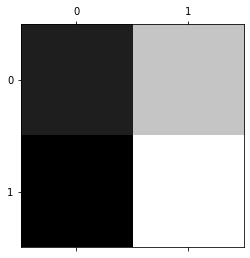

In [252]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [253]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

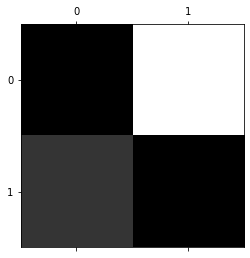

In [254]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

A confusion matrix counts the number of instances that the model was able to classify bankcrupt (yes or no) properly. The first row is the negative class (not bankrupt) and the second row is the positive class (bankrupt). The first column represents the actual class and the second column represents the predicted class. The perfect classifier would produce non-zero values only in the top left and bottom right. This states that the model wrongly classified 45 companies as not bankcrupt (false positives) and wrongly classified 165 companies as bankcrupt (false negatives). 

In [255]:
precision_score(y_train, y_train_pred)

0.5516014234875445

In [256]:
recall_score(y_train, y_train_pred)

0.8469945355191257

In [257]:
f1_score(y_train, y_train_pred)

0.668103448275862

In [258]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)

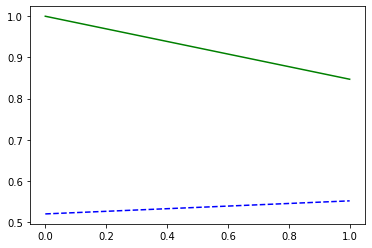

In [259]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Above we looked at precision, recall, and F score. Our current classifier has 55% precision, 85% recall, and an F score of 0.66. Depending on what the business question is, adjustments for precision and recall may need to be made.   

In [260]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

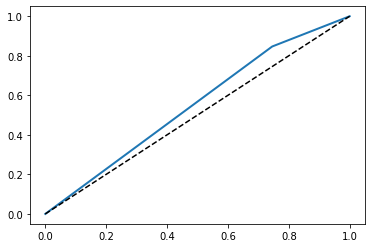

In [261]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 

plot_roc_curve(fpr, tpr)
plt.show()

In [262]:
roc_auc_score(y_train, y_train_pred)

0.5507162026708055

After our summary statistics as well as plotting our ROC graph, it is easy to see that the features and model selected are not very accurate, only 55%. Additional feature and model selection needs to be completed to find a higher accuracy model. 

#### SVM Classifier

In [291]:
#svm_clf = SVC()
#svm_clf.fit(x_train_scaled, y_train) 

In [292]:
#cross_val_score(svm_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

In [293]:
#what changed here compared to when using SGD??
#y2_train_pred = cross_val_score(svm_clf, x_train, y_train, cv=3)

In [294]:
# hmmmm not sure why this isn't working.....
#confusion_matrix(y_train, y2_train_pred)

In [ ]:
#precision_score(y_train, y2_train_pred)

In [ ]:
#svm_reg = LinearSVR(epsilon=1.5)
#svm_reg.fit(x_train, y_train)

In [ ]:
#y3_train_pred = cross_val_score(svm_reg, x_train, y_train, cv=3)

In [ ]:
#confusion_matrix(y_train, y3_train_pred)

confusion matrix:
 [[31 20]
 [ 9 28]]
accuracy score =  0.6704545454545454
Classification Report               precision    recall  f1-score   support

           0       0.78      0.61      0.68        51
           1       0.58      0.76      0.66        37

    accuracy                           0.67        88
   macro avg       0.68      0.68      0.67        88
weighted avg       0.69      0.67      0.67        88



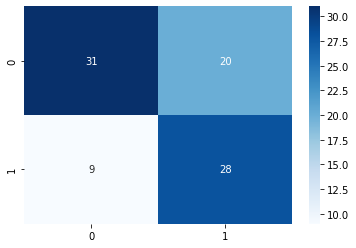

In [286]:
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

#### Logistic Rregression

Logistic Regression accuracy is : 0.6477272727272727
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        51
           1       0.61      0.46      0.52        37

    accuracy                           0.65        88
   macro avg       0.64      0.62      0.62        88
weighted avg       0.64      0.65      0.64        88



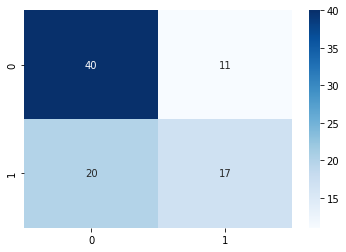

In [284]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(x_test)
report = classification_report(y_test,lr_pred)
print("-"*100)
print(report)
cm = confusion_matrix(y_test,lr_model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

#### Naive Bayes

confusion matrix:
 [[51  0]
 [37  0]]
accuracy score =  0.5795454545454546
Report:               precision    recall  f1-score   support

           0       0.58      1.00      0.73        51
           1       0.00      0.00      0.00        37

    accuracy                           0.58        88
   macro avg       0.29      0.50      0.37        88
weighted avg       0.34      0.58      0.43        88



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


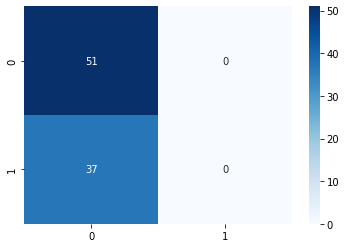

In [285]:
nb = GaussianNB()
nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

nba = accuracy_score(y_test,y_pred)
print('accuracy score = ', accuracy_score(y_test,y_pred))
print("Report:", classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

### Accuracy Comparison

Text(0.5, 1.0, 'Plotting the Model Accuracies')

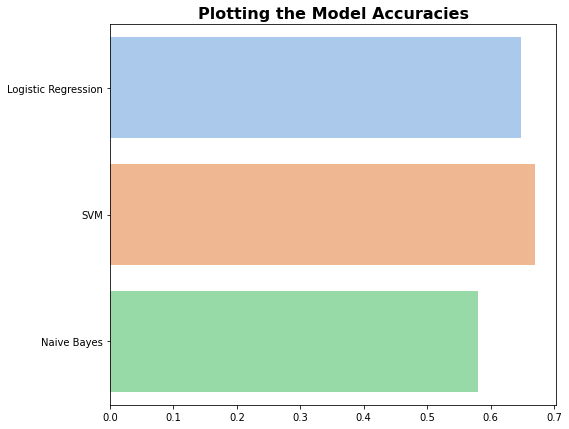

In [281]:
plt.figure(figsize= (8,7))
# change names based on models you picked
ac = [accuracy_lr,sva2,nba]
name = ['Logistic Regression','SVM','Naive Bayes']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")